In [2]:
!pip install -q kaggle

In [9]:
!mkdir -p ~/.kaggle

In [10]:
!mv ./kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d jessicali9530/lfw-dataset


Dataset URL: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset
License(s): other


In [13]:
!unzip lfw-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0025.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0026.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0027.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0028.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0029.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Si

In [14]:
from time import time
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [15]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [18]:
lfw_people.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\nhttp://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\nimple

In [19]:
lfw_people.data.shape

(1288, 1850)

In [23]:
n_samples, h, w = lfw_people.images.shape

In [21]:
n_samples, h, w

(1288, 50, 37)

In [24]:
X = lfw_people.data
n_features = X.shape[1]

In [28]:
n_features

1850

In [29]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [34]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [40]:
lfw_people

{'data': array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
         0.3803922 ],
        [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
         0.53594774],
        [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
         0.7163399 ],
        ...,
        [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
         0.19346406],
        [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
         0.6117647 ],
        [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
         0.2535948 ]], dtype=float32),
 'images': array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
          0.24836601, 0.20653595],
         [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
          0.2535948 , 0.21568628],
         [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
          0.24183007, 0.21568628],
         ...,
         [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
     

In [45]:
import pandas as pd
df = pd.DataFrame(X)

# Add the target (person ID) and person name to the DataFrame
df['target'] = y
df['person_name'] = [target_names[i] for i in y]
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1842,1843,1844,1845,1846,1847,1848,1849,target,person_name
0,0.997386,0.996078,0.992157,0.966013,0.758170,0.569935,0.700654,0.794771,0.784314,0.767320,...,0.422222,0.415686,0.401307,0.393464,0.390850,0.381699,0.388235,0.380392,5,Hugo Chavez
1,0.147712,0.197386,0.175163,0.192157,0.385621,0.473203,0.543791,0.615686,0.671895,0.694118,...,0.296732,0.307190,0.325490,0.410458,0.487582,0.457516,0.444444,0.535948,6,Tony Blair
2,0.343791,0.394771,0.491503,0.555556,0.597386,0.611765,0.606536,0.626144,0.640523,0.652288,...,0.379085,0.410458,0.498039,0.448366,0.481046,0.709804,0.721569,0.716340,3,George W Bush
3,0.047059,0.016993,0.023529,0.016993,0.031373,0.230065,0.677124,0.667974,0.641830,0.400000,...,0.903268,0.915033,0.918954,0.925490,0.513725,0.065359,0.142484,0.201307,1,Colin Powell
4,0.471895,0.458824,0.486275,0.499346,0.494118,0.513726,0.545098,0.543791,0.560784,0.581699,...,0.019608,0.018301,0.018301,0.039216,0.036601,0.078431,0.250980,0.278431,0,Ariel Sharon


In [46]:
print("Total dataset size :")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size :
n_samples: 1288
n_features: 1850
n_classes: 7


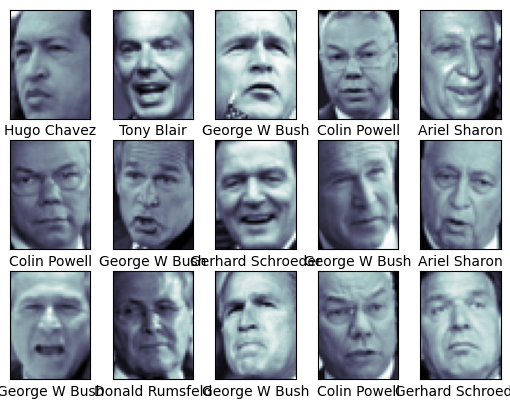

In [50]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate (ax.flat):
  axi.imshow(lfw_people.images[i], cmap = 'bone')
  axi.set(xticks = [], yticks = [], xlabel = lfw_people.target_names[lfw_people.target[i]])


In [52]:
n_photos_per_person = {}
for person_id in lfw_people.target:
  person_name = lfw_people.target_names[person_id]
  if person_name not in n_photos_per_person:
    n_photos_per_person[person_name] = 0
  n_photos_per_person[person_name] += 1

for person_name, n_photos in n_photos_per_person.items():
  print(f'{person_name}: {n_photos}')

Hugo Chavez: 71
Tony Blair: 144
George W Bush: 530
Colin Powell: 236
Ariel Sharon: 77
Gerhard Schroeder: 109
Donald Rumsfeld: 121


In [53]:
print(f"Image dimensions: {h} x {w}")

Image dimensions: 50 x 37


In [54]:
aspect_ratio = w/h
print(f"Aspect ratio: {w}:{h}")


Aspect ratio: 37:50


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train_scaled.shape[0]))
t0 = time()
pca = PCA(n_components = n_components, whiten = True, svd_solver="randomized").fit(X_train_scaled)
print(f"done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 966 faces
done in 2.260s


In [69]:
print(eigenfaces)

[[[ 5.82697615e-03  6.93441974e-03  9.16903839e-03 ...  8.82731564e-03
    7.56869512e-03  7.37207104e-03]
  [ 6.37697522e-03  7.90282711e-03  1.09057296e-02 ...  9.89482366e-03
    8.34798440e-03  8.12572986e-03]
  [ 7.33780675e-03  9.41980258e-03  1.27895456e-02 ...  1.13821179e-02
    9.14715603e-03  8.62458907e-03]
  ...
  [ 2.24085711e-03  2.20075180e-03  3.55509459e-03 ...  6.58962224e-03
    6.05421234e-03  5.60129667e-03]
  [ 2.85880058e-03  2.85917474e-03  3.29415547e-03 ...  6.39540050e-03
    5.71602164e-03  5.27815334e-03]
  [ 3.35464673e-03  3.35093332e-03  3.36819724e-03 ...  5.98709099e-03
    5.57863060e-03  5.13796741e-03]]

 [[ 1.80255789e-02  1.70891359e-02  1.86474323e-02 ... -1.56081244e-02
   -1.52039770e-02 -1.44853070e-02]
  [ 1.77817345e-02  1.74964070e-02  2.07723994e-02 ... -1.68216396e-02
   -1.63863711e-02 -1.53259216e-02]
  [ 1.79046504e-02  1.91087760e-02  2.32795924e-02 ... -1.86899193e-02
   -1.76478736e-02 -1.68224052e-02]
  ...
  [ 1.07766418e-02  1.1

In [67]:
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"done in %0.3fs" % (time()-t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.232s


In [71]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}

clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight= "balanced"),
    param_grid,
    n_iter = 10
)

clf = clf.fit(X_train_pca, y_train)
print(f"done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 7.214s
Best estimator found by grid search:
SVC(C=np.float64(6534.835844583369), class_weight='balanced',
    gamma=np.float64(0.0022458035823299475))


In [72]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print(f"done in %0.3fs" % (time() - t0))

Predicting people's names on the test set
done in 0.063s


In [73]:
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.69      0.67        13
     Colin Powell       0.71      0.87      0.78        60
  Donald Rumsfeld       0.76      0.70      0.73        27
    George W Bush       0.92      0.92      0.92       146
Gerhard Schroeder       0.83      0.76      0.79        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.94      0.81      0.87        36

         accuracy                           0.84       322
        macro avg       0.80      0.76      0.77       322
     weighted avg       0.85      0.84      0.84       322



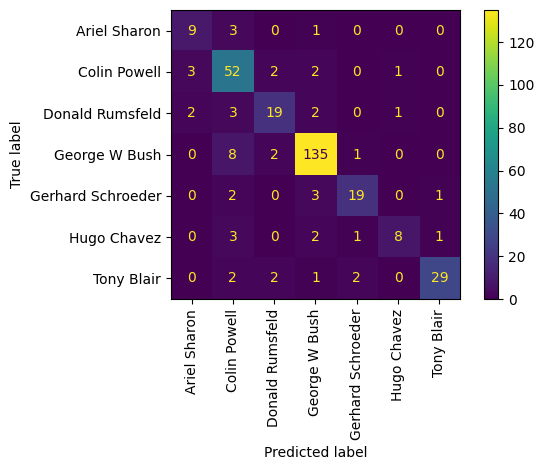

In [75]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_pca, y_test, display_labels = target_names, xticks_rotation = "vertical")
plt.tight_layout()
plt.show()

In [76]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
  """ helper function to plot a gallery of portraits"""
  plt.figure(figsize = (1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom = 0, left = .01, right = .99, top = .90, hspace = .35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
    plt.title(titles[i], size = 12)
    plt.xticks(())
    plt.yticks(())

In [77]:
def title(y_pred, y_test, target_names, i):
  pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
  true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
  return "predicted: %s\ntrue:      %s" % (pred_name, true_name)

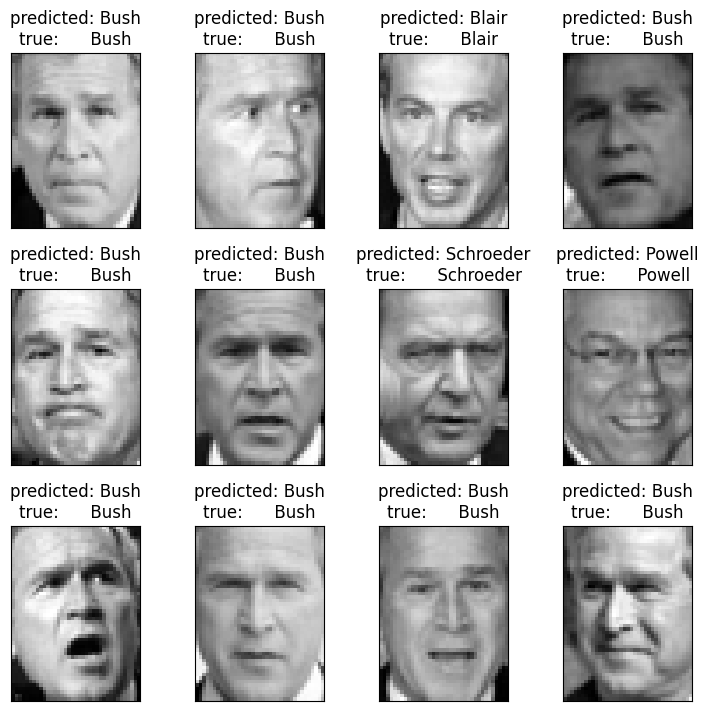

In [78]:
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)


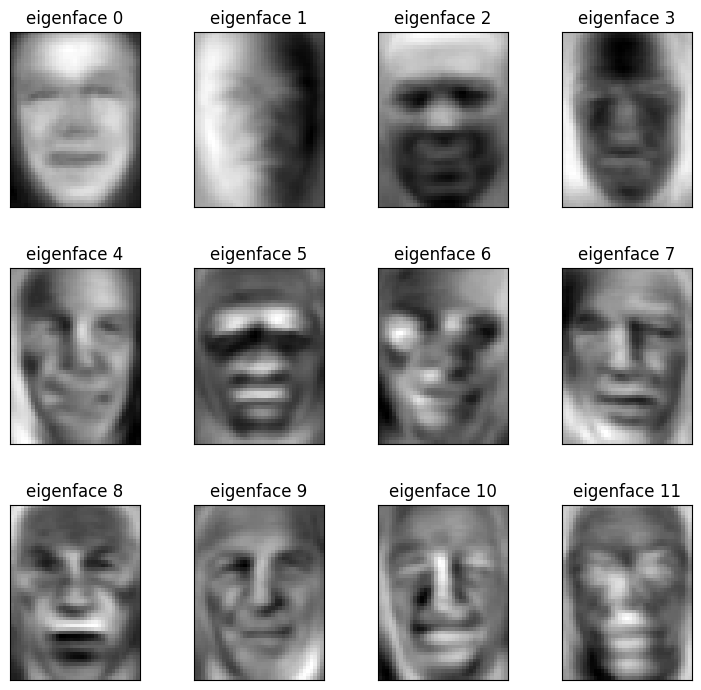

In [79]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression


In [90]:
estimators = [
    ('svc', SVC(kernel = 'rbf', class_weight = 'balanced', probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors = 5)),
    ('rf', RandomForestClassifier(n_estimators = 150)),
    ('gb', GradientBoostingClassifier(n_estimators = 150))
]

In [91]:
print("Tracking Stacking Ensemble .....")
t0 = time()
clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
clf.fit(X_train_pca, y_train)
print(f"done in %0.3fs" % (time() - t0))

Tracking Stacking Ensemble .....
done in 371.981s


In [92]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print(f"done in %0.3fs" % (time() - t0))

Predicting people's names on the test set
done in 0.185s


In [93]:
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.85      0.76        13
     Colin Powell       0.87      0.88      0.88        60
  Donald Rumsfeld       0.85      0.63      0.72        27
    George W Bush       0.92      0.97      0.94       146
Gerhard Schroeder       0.88      0.88      0.88        25
      Hugo Chavez       0.80      0.80      0.80        15
       Tony Blair       0.97      0.86      0.91        36

         accuracy                           0.89       322
        macro avg       0.85      0.84      0.84       322
     weighted avg       0.89      0.89      0.89       322



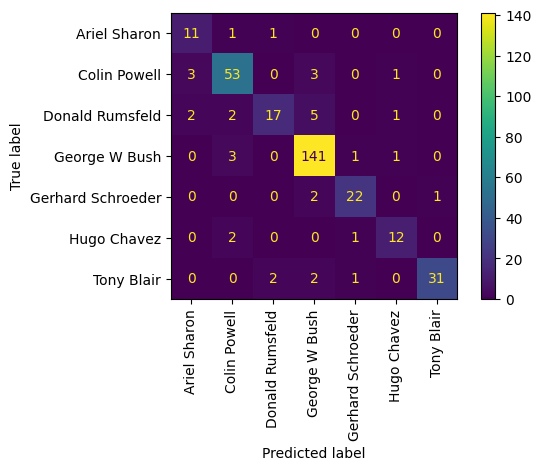

In [94]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_pca, y_test, display_labels = target_names, xticks_rotation = "vertical")
plt.tight_layout()
plt.show()